<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2019-2020/Pr%C3%A1cticas/Pr%C3%A1ctica6_TLC_Solucions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pràctica 6: Teorema del límit central**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones**

*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu entrega) en la cabecera de este Notebook.
*   Renombra el Notebook como "Pr6_{NIU}.ipynb", donde {NIU} es tu NIU (*p.e. Pr6_2055007.ipynb*) 
*   Al final de la clase donde se realize una entrega, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](http://cern.ch/go/MK9W). Asegurate de que el fichero tiene el nombre correcto.

<hr>



**Objectiu de la pràctica** 

En aquesta pràctica veurem el Teorema del Límit Central *at work*... 

Per què són tan comuns les distribucions normals? És degut a que la suma de múltiples variables aleatòries e independents es distribueix com una normal si:

1. Les mitjes i les variàncies són finites.
2. Tenim una quantitat suficient (unes 25).

Cada observació en la nostra distribució $x$ segueix:

$$x = \frac{1}{N} \sum_i^N r_i$$

on $r_i$ segueixen la mateixa o diferents distribucions. El TLC  diu que si $N$ és suficientment gran, $p(x) \sim N(\mu,\sigma)$  independentment de les $p(r_i)$. On $\mu$ és el promig de les $x$, i $\sigma = \frac{\bar{\sigma}}{\sqrt{N}}$.

### <font color='orange'>**> Python #1**</font>

Anem a fer una demostració del TLC amb la distribució beta.

Considerem la nostra equació mitjana:
$$
x = \frac{1}{N} \sum_i^N r_i
$$

Considerem el TLC amb només 1 distribució i mostres de mida $N=1$. Noteu que el TLC no és aplicable ja que $N=1$. Considerem que l'única contribució és una distribució beta:

$$
p(r_i) = \frac{1}{Z}\, r_i^{\alpha - 1} \,(1 - r_i)^{\beta - 1}
$$

On $Z$, $\alpha$, and $\beta$ són paràmetres de la distribució beta. En aquest cas l'espai mostral és $[0,1]$, fixem $\alpha = \beta = 0.5$ (el factor de normalització $Z$ queda totalment determinat una vegada escollim $\alpha, \beta$).

Tenim $N = 1$. Quin aspecte tindrà la distribució dels $x$? Serà normal? Fer un exemple amb 1000 realizacions.

[Com obtenir valors d'una distribució beta](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html)

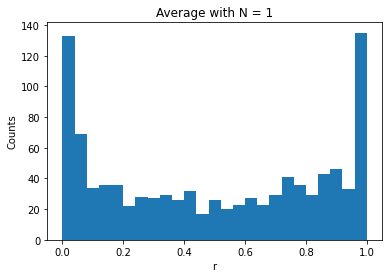

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

N_exp = 1000

data = []
#for N_exp times (enough to get a nice plot)
for i in range(N_exp):
    data.append(ss.beta.rvs(0.5, 0.5))


#histogram the samples
plt.hist(data, bins=25)
plt.title('Average with N = 1')
plt.xlabel("x")
plt.ylabel("Counts")
#Show the plot. 
plt.show() 

### <font color='orange'>**> Python #2**</font>

$N=1$ significa que per cada observació de $x$, tenim 1 contribució $r_i$ a la mitjana. En aquest cas, $x$ = $r_i$, però què passarà si $N>1$ on cada $r_i$ segueix la **mateixa** distribució beta? Considerem $N=25$, i comparem el resultat amb una distribució Gaussiana. Fer un exemple amb 1000 realizacions.

De fet es pot comprovar que quan N va creixent la distribució de les mitjes calculades s'assembla més a una Gaussiana.


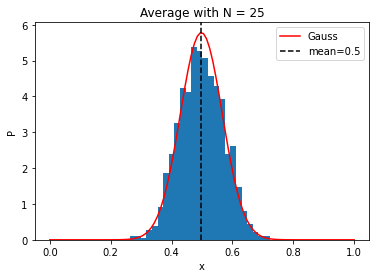

In [4]:
import scipy.stats as ss

#Sample 25 beta numbers 1000 times
N = 25
N_exp = 1000
data = []
beta_sigmas = []
for i in range(N_exp):
    #Here's where we use the average equation
    #we'll do this more automatically using np.mean
    rs = ss.beta.rvs(0.5, 0.5, size=N)
    data.append(np.mean(rs))
    beta_sigmas.append(np.std(rs))

#histogram the samples with 25 bins
plt.hist(data, bins=25, density=True)
mean = np.mean(data)
#sigma = np.std(data)
sigma = np.mean(beta_sigmas)/np.sqrt(N)  # <------------------------------------------
x = np.linspace(0,1,100)
y = ss.norm.pdf(x,mean,sigma)
plt.plot(x, y, 'r', label="Gauss")
plt.title('Average with N = {}'.format(N))
plt.axvline(mean,linestyle='--',color='k',label='mean={:.2g}'.format(mean))
plt.legend()
plt.xlabel("x")
plt.ylabel("P")
plt.show()

### <font color='orange'>**> Python #3**</font>

Hem aconseguit moure'ns d'un espai mostral $[0,1]$  a un que sembla $(-\infty, \infty)$. El TLC també ha aconseguit converir la distribució beta, que té pics als extrems, en una normal. Increíble!

Intentem fer encara més. Considerem mostres que segueixen un conjunt de distribucions binomials i prenem la seva mitjana. En aquest cas tindrem múltiples distribucions a sobre discretes!

Recordatori. Estem calculant:
$$
x = \frac{1}{N} \sum_i^N r_i
$$

on $r_i \sim P_i(r_i)$, un conjunt de distribucions binomials. 

En estadística, la [distribució binomial](https://ca.wikipedia.org/wiki/Distribuci%C3%B3_binomial) és una distribució de probabilitat discreta que fa el recompte del nombre de vegades que es verifica l'èxit de l'esdeveniment A quan es repeteix n vegades, de forma independent i en les mateixes condicions, una experiència de Bernouilli.

La distribució binomial té dos parámetres principals:

$$
Bin(k;n,p) = \binom{n}{k}p^k(1-p)^{n-k}
$$

[Com obtenir valors d'una binomial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)

Vegem un **exemple** de com obtenir una mostra de mida 1000 d'una binomial amb $n=10$, $p=0.1$


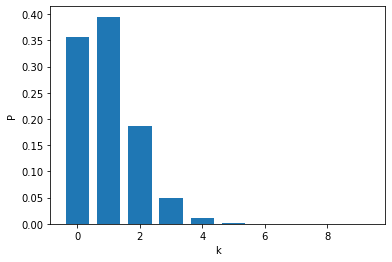

In [3]:
#Explicar cómo cambia la muestra si movemos p
data_binom = ss.binom.rvs(10,0.1,size=1000)

plt.hist(data_binom,range=[0,10],bins=10,density=True,rwidth=0.75, align='left')
plt.xlabel("k")
plt.ylabel("P")
plt.show() 

Ara volem fer l'estudi que hem fet abans pel TLC utilitzant la binomial $(n=10,p=0.1)$ en comptes de la beta.

Si considerem el cas quan $N=1$ i $N_{exp} = 1000$:

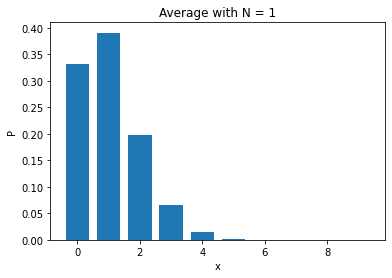

In [6]:
N_exp = 1000

data = []
#for N_exp times (enough to get a nice plot)
for i in range(N_exp):
    data.append(ss.binom.rvs(10,0.1))

#histogram the samples
plt.hist(data,range=[0,10],bins=10,density=True,rwidth=0.75, align='left')
plt.title('Average with N = 1')
plt.xlabel("x")
plt.ylabel("P")
#Show the plot. 
plt.show() 

### <font color='orange'>**> Python #4**</font>

Com abans, per $N=1$ obtenim la binomial. I si augmentem $N$? Mirem un exemple amb $N=25$ i comparem amb la distribució Gaussiana.


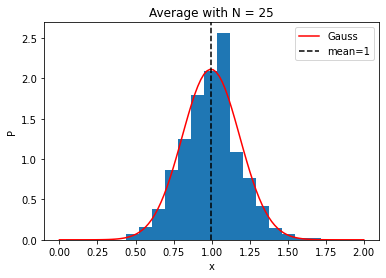

In [7]:
N_exp = 1000
N = 25  # No ir mucho más de int(1e5)
data = []
for i in range(N_exp):
    rs = ss.binom.rvs(10,0.1,size=N)
    data.append(np.mean(rs))

#histogram the samples with 25 bins
plt.hist(data, bins=15, density=True)
mean = np.mean(data)
sigma = np.std(data)
x = np.linspace(0,2,100)
y = ss.norm.pdf(x,mean,sigma)
plt.plot(x, y, 'r', label="Gauss")
plt.title('Average with N = {}'.format(N))
plt.axvline(mean,linestyle='--',color='k',label='mean={:.2g}'.format(mean))
plt.legend()
plt.xlabel("x")
plt.ylabel("P")
plt.show()

Veiem que amb una distribució discreta el TLC encara funciona! 

Si les variables vinguessin de distribucions diferents, una combinació independent d'elles encara ens donarà una Gaussiana. Un exemple d'això es pot veure com a material addicional al final de la pràctica.

### <font color='green'>**> ENTREGA**</font>


En aquesta entrega veurem un exemple més del Teorema Central del Límit. Aquesta vegada utilitzant la distribució exponencial, la pdf de la qual ve donada per:

$$
f(r,\lambda) = \lambda e^{-\lambda x} \qquad \text{per } x \geq 0
$$

Com moltes altres distribucions, l'exponencial també es pot trobar a ```scipy.stats```:

```ss.expon.rvs(loc=0, scale=1, size=1)```

```ss.expon.pdf(x, loc=0, scale=1)```

<font color='red'><b>NOTA:</b> Si volem treballar amb una exponencial amb un parámetre particular $\lambda$; hem de donar a la funció la corresponent ```scale=1/lambda```</font>


In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

  1. Genera una mostra de 1000 elements distribuïda amb una distribució exponencial de paràmetre $\lambda = 2$. Fes un plot on es vegi l'histograma normalitzat de la mostra i la pdf corresponent per comprovar que efectivament la mostra segueix aquesta distribució exponencial. Fes que l'histograma tingui 50 bins i s'extengui en un interval de [0,4].

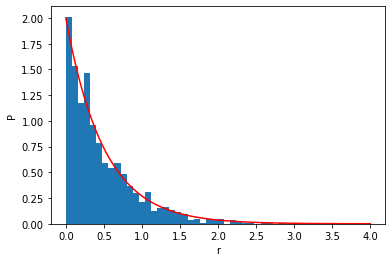

In [8]:
m = ss.expon.rvs(scale=1/2,size = 1000)
x = np.linspace(0,4,100)
y = ss.expon.pdf(x,scale=1/2)

plt.hist(m,bins=50,density=True,range=[0,4])
plt.plot(x,y,'r')
plt.xlabel('r')
plt.ylabel('P')
plt.show()

2. Genera una mostra $A$ de 1000 elements $\bar{x}_i$:

$$
A = [\bar{x}_1,\bar{x}_2,...,\bar{x}_{1000}]
$$ 

on cada element és calculat a partir de la mitjana d'una mostra de 50 elements distribuïts seguint una distribució exponencial de paràmetre $\lambda = 2$.

$$
\bar{x}_i = \frac{1}{50} \sum_{j=1}^{50} r_j \\[10pt]
r \sim Exp(\lambda=2)
$$  

Fes un histograma normalitzat d'$A$ amb 50 bins i que s'extengui en un interval de [0,1]. 


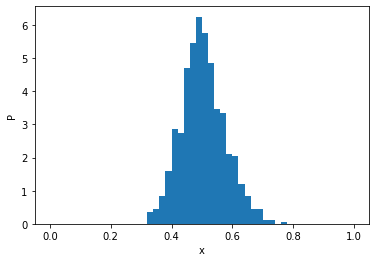

In [9]:
x_bars = []
for i in range(1000):
  m = ss.expon.rvs(scale=1/2,size = 50)
  x_bars.append(np.mean(m))

plt.hist(x_bars, bins=50, density=True, range=[0,1])
plt.xlabel("x")
plt.ylabel("P")
plt.show()

3. Afegeix a l'histograma de l'apartat anterior la pdf d'una Gaussiana amb $\mu = \bar{A}$ i $\sigma = \sqrt{Var[A]}$

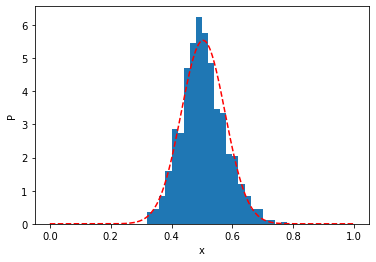

In [10]:
x = np.linspace(0,1,1000)
y = ss.norm.pdf(x,loc=np.mean(x_bars),scale=np.std(x_bars))

plt.hist(x_bars, bins=50, density=True, range=[0,1])
plt.plot(x,y,'r--')
plt.xlabel("x")
plt.ylabel("P")
plt.show()

<hr> 

**Recuerda**

*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu entrega) en la cabecera de este Notebook.
*   Renombra el Notebook como "Pr6_{NIU}.ipynb", donde {NIU} es tu NIU (*p.e. Pr6_2055007.ipynb*) 
*   Al final de la clase donde se realize una entrega, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](http://cern.ch/go/MK9W). Asegurate de que el fichero tiene el nombre correcto.
*   Solo se evaluará la parte de la entrega. Tendréis acceso a la solución de todas las partes y después de haber entregado la práctica.

<hr>


### <font color='blue'>**> MATERIAL ADICIONAL**</font>


Abans, hem vist el TLC utilitzant una distribució beta i la distribució binomial; pero en ambdós casos sempre feiem servir els mateixos paràmetres per la beta i per la binomial (i.e. $\underbrace{\alpha,\beta}_{\text{beta}}$,$\underbrace{n,p}_{\text{Binomial}}$)

I si intentem que cada Binomial tingui paràmetres diferents?

$$
r_i \sim Bin(k;n_i,p_i)
$$

$$
x = \frac{1}{N} \sum_i^N r_i
$$


In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [0]:
N_exp = 1000 # Farem 1000 experiments
N = 100 # Per cada experiment, prendrem una mostra de r's on cada r segueix una binomial diferent

some_ns = np.random.randint(1,15,N)   # Obtener un array de N integers aleatorios entre 1 y 15
some_ps = np.random.random(N)         # Obtener un array de N floats aleatorios entre 0 y 1

data = []
for i in range(N_exp):
  suma_ri = 0
  for j in range(N):
    suma_ri += ss.binom.rvs(some_ns[j], some_ps[j])  # j pren valors de 0 a N-1, per tant, estem sumant nombres aleatoris r~Bin(n_j,p_j)
  data.append(suma_ri/N)

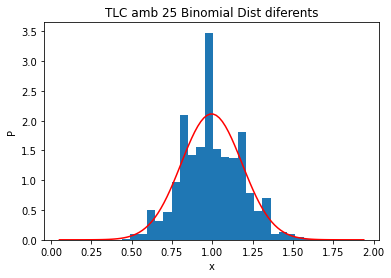

In [11]:
plt.hist(data, bins=25, density = True)
mu = np.mean(data)
sigma = np.std(data)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y = ss.norm.pdf(x, mu, sigma)
plt.plot(x,y, color = 'r')
plt.title('TLC amb {} Binomial Dist diferents'.format(N))
plt.xlabel("x")
plt.ylabel("P")
plt.show()

Tot i que les distribucions són diferents i *discretes*, la seva mitjana es transforma en una distribució normal!
